<a href="https://colab.research.google.com/github/ranipriyanka20/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><B>Name :</b> Rani Priyanka<br>
<b>Topic : </b>Advancing Understanding and Management of Chronic Kidney Disease: A Comprehensive Analysis



Chronic kidney disease (CKD) poses a global public health challenge, silently impacting millions with its insidious progression. Despite existing management strategies, early detection and effective interventions remain elusive. Here, we propose a novel approach using Python programming language and Exploratory Data Analysis (EDA) to illuminate the complex landscape of CKD. By analyzing diverse datasets, we aim to identify hidden patterns and associations, uncovering potential biomarkers, predicting disease progression, and tailoring personalized treatment plans. This data-driven approach holds promise for revolutionizing CKD management, transitioning from reactive interventions to proactive prevention and personalized medicine. Through comprehensive analysis and visualization, we hope to illuminate the path towards a future where CKD is not merely managed, but effectively prevented and controlled.


# Importing libraries

In [28]:
pip install snowflake-connector-python

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import snowflake.connector

# Functions to use in Program

In [38]:
# Shape of Data
'''Shape of Data (print_shape(data))

This function prints the shape of the pandas DataFrame data.
This gives you the number of rows and columns in your dataset.'''
def print_shape(data):
    print(f"Shape of Data : {data.shape}")

# Null Values
"""2. Null Values (null_value_counter(data))

This function identifies and displays null values in data. It:

Calculates the sum of null values for each column and sorts them in descending order.
Creates a DataFrame with "Null Rows" and "Percentage" columns.
Calculates the percentage of null values for each column as a string with a '%' symbol.
Displays the DataFrame."""
def null_value_counter(data):
    null_values = data.isnull().sum().sort_values(ascending=False).to_frame()
    null_values.columns = ["Null Rows"]
    total_rows = data.shape[0]

    null_values["Percentage"] = (null_values["Null Rows"]/ total_rows)*100
    null_values["Percentage"] = null_values["Percentage"].astype(str) + " %"
    display(null_values)

# Duplicate Values
"""
3. Duplicate Values (duplicate(data))

This function checks for duplicate rows in data and prints the total number of duplicates found.
"""
def duplicate(data):
    print(f"Duplicate rows in data {data.duplicated().sum()}:")

# Columns Data type
""""
4. Columns Data Type (column_info(data))

This function analyzes the data types of each column in data:

Gets the data types and column names.
Creates a DataFrame with "data_type" and "column_names" columns.
Groups the DataFrame by data type and counts the number of columns with each type.
Displays the resulting DataFrame.
"""
def column_info(data):
    data_types  = data.dtypes
    column_names = data.columns
    type_df = pd.DataFrame({"data_type": data_types, "column_names": column_names})
    display(type_df.groupby("data_type")["column_names"].value_counts().to_frame())

# Type conversion
"""
5. Type Conversion (type_conversion(data,data_types))

This function cleans and converts data types in data:

Replaces empty strings with np.nan (missing values) for each column.
Converts each column to the specified data type in data_types.
Returns the cleaned and converted data DataFrame.
"""
def type_conversion(data,data_types):
    for col in data.columns:
        data[col] = data[col].replace("",np.nan)
        data[col].astype(data_types[col])
    return data


import matplotlib.pyplot as plt

def plot_data(title, x, y, chart_type="line"):
  """
  Generates a plot based on provided data and chart type.

  Args:
      title: String title for the plot.
      x: List or array of x-axis values.
      y: List or array of y-axis values.
      chart_type: String representing the desired chart type ("line", "bar", "scatter", etc.).

  Returns:
      None (the plot is displayed directly).
  """

  # Validate chart type
  valid_charts = ["line", "bar", "scatter"]
  if chart_type not in valid_charts:
    raise ValueError(f"Invalid chart type '{chart_type}'. Choose from {valid_charts}")

  # Generate plot based on type
  if chart_type == "line":
    plt.plot(x, y)
  elif chart_type == "bar":
    plt.bar(x, y)
  elif chart_type == "scatter":
    plt.scatter(x, y)
  else:
    raise NotImplementedError(f"Chart type '{chart_type}' not yet implemented.")

  # Set title and labels
  plt.title(title)
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")

  # Show the plot
  plt.show()

# **Data Access and Formats**

Unveiling the mysteries of chronic kidney disease (CKD) demands a multifaceted approach. This study bridges the gap between Snowflake's structured CSV data and local JSON files, leveraging Python and Exploratory Data Analysis (EDA) to unlock hidden patterns and personalize CKD management.

## **Data 1 :** Read Data from snowflack

> ### [ Formate : CSV ]

In [44]:
# Connect to Snowflake with specified credentials
con = snowflake.connector.connect(
    user='ranipriyankakatam',
    password='Priyanka@2000',
    account='ioaxejh-oh01162',
    database='MYDATASET',
    schema='PUBLIC',
    warehouse='COMPUTE_WH',
    session_parameters={
        'QUERY_TAG': 'Demo User Interaction',
    }
)

In [46]:
# Execute an SQL query using a cursor on the database connection
ckd_snlfk = con.cursor().execute('''select * from IDENTIFIER('"MYDATASET"."PUBLIC"."KIDNEY"') ''').fetch_pandas_all()
# Display the first five rows of the fetched data
ckd_snlfk.head()

,ID,AGE,BP,SG,AL,SU,RBC,PC,PCC,BA,...,WC,RC,HTN,DM,CAD,APPET,PE,ANE,CLASSIFICATION,CITY
0,0,48.0,80.0,1.0,1.0,0.0,None,normal,notpresent,notpresent,...,7800,5.2,True,True,False,good,False,False,ckd,North Judithbury
1,1,7.0,50.0,1.0,4.0,0.0,None,normal,notpresent,notpresent,...,6000,None,False,False,False,good,False,False,ckd,East Jill
2,2,62.0,80.0,1.0,2.0,3.0,normal,normal,notpresent,notpresent,...,7500,None,False,True,False,poor,False,True,ckd,New Roberttown
3,3,48.0,70.0,1.0,4.0,0.0,normal,abnormal,present,notpresent,...,6700,3.9,True,False,False,poor,True,True,ckd,East Jessetown
4,4,51.0,80.0,1.0,2.0,0.0,normal,normal,notpresent,notpresent,...,7300,4.6,False,False,False,good,False,False,ckd,Lake Debra


## **Data 2 :** Read Data from local machine

> ### [ Formate : JSON ]

In [48]:
# Specify the path to the JSON file
json_path = r"new_data.json"

# Read the JSON file into a DataFrame, inferring data types
ckd_jsn = pd.read_json(json_path, dtype=True)

# Display the first two rows of the DataFrame
ckd_jsn.head(2)


,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,AL,Alabama,Hoover,City,BRFSS,Health Outcomes,0135896,Chronic kidney disease among adults aged >=18 ...,%,...,2.5,,,81619,"(33.3767602729, -86.8051937568)",HLTHOUT,KIDNEY,0135896,,Chronic Kidney Disease
1,2017,CA,California,Chula Vista,City,BRFSS,Health Outcomes,0613392,Chronic kidney disease among adults aged >=18 ...,%,...,2.9,,,243916,"(32.6282964262, -117.010042407)",HLTHOUT,KIDNEY,0613392,,Chronic Kidney Disease


# **Data Analysis**

## Data information For Data1

In [51]:
# Display the shape of the DataFrame 'ckd_snlfk'
print_shape(ckd_snlfk)

# Check for duplicate rows in the DataFrame 'ckd_snlfk'
duplicate(ckd_snlfk)


Shape of Data : (400, 27)
Duplicate rows in data 0:


In [54]:
# Count and display the number of null values in each column of the DataFrame 'ckd_snlfk'
null_value_counter(ckd_snlfk)

,Null Rows,Percentage
RBC,152,38.0 %
RC,130,32.5 %
WC,105,26.25 %
POT,88,22.0 %
SOD,87,21.75 %
PCV,70,17.5 %
PC,65,16.25 %
HEMO,52,13.0 %
SU,49,12.25 %
SG,47,11.75 %


In [58]:
# Display information about the columns in the DataFrame 'ckd_snlfk'
column_info(ckd_snlfk)


column_names
data_type column_names                
int16     ID                         1
float64   AGE                        1
          AL                         1
          BGR                        1
          BP                         1
          BU                         1
          HEMO                       1
          POT                        1
          SC                         1
          SG                         1
          SOD                        1
          SU                         1
object    ANE                        1
          APPET                      1
          BA                         1
          CAD                        1
          CITY                       1
          CLASSIFICATION             1
          DM                         1
          HTN                        1
          PC                         1
          PCC                        1
          PCV                        1
          PE                         1
          RBC                        1
          RC                         1
          WC                         1

## For Data2

In [62]:
# Define a dictionary specifying data types for each column in the dataset
data_types = {

    "Year": int,"PopulationCount": int,

    "StateAbbr": str,"StateDesc": str,"CityName": str,"GeographicLevel": str,"DataSource": str,"Category": str,"UniqueID": str,"Measure": str,
    "Data_Value_Unit": str, "DataValueTypeID": str, "Data_Value_Type": str,"Data_Value_Footnote_Symbol": str,"Data_Value_Footnote": str,
    "GeoLocation": str,"CategoryID": str,"MeasureId": str,"CityFIPS": str,"TractFIPS": str,"Short_Question_Text": str,

    "Data_Value": float, "Low_Confidence_Limit": float, "High_Confidence_Limit": float,

}


In [65]:
# Perform type conversion using the 'type_conversion' function on the 'ckd_jsn' DataFrame
ckd_jsn = type_conversion(ckd_jsn,data_types)

In [67]:
# Display the shape of the DataFrame 'ckd_jsn'
print_shape(ckd_jsn)

# Check for duplicate rows in the DataFrame 'ckd_jsn'
duplicate(ckd_jsn)


Shape of Data : (29006, 24)
Duplicate rows in data 0:


In [69]:
# Count and display the number of null values in each column of the DataFrame 'ckd_jsn'
null_value_counter(ckd_jsn)

,Null Rows,Percentage
Data_Value_Footnote,28212,97.26263531683101 %
Data_Value_Footnote_Symbol,28212,97.26263531683101 %
TractFIPS,1002,3.454457698407226 %
Data_Value,794,2.7373646831689995 %
Low_Confidence_Limit,794,2.7373646831689995 %
High_Confidence_Limit,794,2.7373646831689995 %
CityName,2,0.006895125146521409 %
CityFIPS,2,0.006895125146521409 %
GeoLocation,2,0.006895125146521409 %
MeasureId,0,0.0 %


In [71]:
# Display information about the columns in the DataFrame 'ckd_jsn'
column_info(ckd_jsn)


column_names
data_type column_names                            
int64     PopulationCount                        1
          Year                                   1
float64   Data_Value                             1
          High_Confidence_Limit                  1
          Low_Confidence_Limit                   1
object    Category                               1
          CategoryID                             1
          CityFIPS                               1
          CityName                               1
          DataSource                             1
          DataValueTypeID                        1
          Data_Value_Footnote                    1
          Data_Value_Footnote_Symbol             1
          Data_Value_Type                        1
          Data_Value_Unit                        1
          GeoLocation                            1
          GeographicLevel                        1
          Measure                                1
          MeasureId                              1
          Short_Question_Text                    1
          StateAbbr                              1
          StateDesc                              1
          TractFIPS                              1
          UniqueID                               1

# **Data merging**

In [72]:
# Display the column names of 'ckd_snlfk' and 'ckd_jsn' DataFrames
ckd_snlfk.columns, ckd_jsn.columns


(Index(['ID', 'AGE', 'BP', 'SG', 'AL', 'SU', 'RBC', 'PC', 'PCC', 'BA', 'BGR',
        'BU', 'SC', 'SOD', 'POT', 'HEMO', 'PCV', 'WC', 'RC', 'HTN', 'DM', 'CAD',
        'APPET', 'PE', 'ANE', 'CLASSIFICATION', 'CITY'],
       dtype='object'),
 Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
        'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
        'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
        'Low_Confidence_Limit', 'High_Confidence_Limit',
        'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
        'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
        'Short_Question_Text'],
       dtype='object'))

In [74]:
# Converting columns into lower
ckd_snlfk.columns = [col.lower() for col in ckd_snlfk.columns]

In [75]:
# Rename to match with other columns
ckd_snlfk.rename(columns={"city":"CityName"},inplace=True)

In [76]:
# ckd_snlfk.merge(ckd_jsn,on="city")
data_mrg = ckd_snlfk.merge(ckd_jsn,how="outer",on="CityName")


In [77]:
# merging columns to get batter idea of data
data_mrg_1 = ckd_snlfk.merge(ckd_jsn,how="inner",on="CityName")

# After merging group by data by city



In [78]:
ckd_jsn.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [79]:
# Creating group of data which show mean of data
city_pop = ckd_jsn.groupby("CityName").mean()
city_pop

<ipython-input-79-6681493901d5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_pop = ckd_jsn.groupby("CityName").mean()


,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount
CityName,,,,,
Abilene,2017.0,3.092308,2.925641,3.274359,8779.725000
Akron,2017.0,3.661765,3.461765,3.879412,8533.285714
Alameda,2017.0,2.616667,2.494444,2.766667,12302.000000
Albany,2017.0,3.512727,3.310909,3.740000,9561.272727
Albuquerque,2017.0,3.016547,2.851799,3.198561,11532.084507
...,...,...,...,...,...
Wyoming,2017.0,2.856250,2.693750,3.000000,12020.833333
Yakima,2017.0,3.866667,3.633333,4.147619,11383.375000
Yonkers,2017.0,3.160377,2.973585,3.349057,11092.981132


In [80]:
# Grouping data as per city

city_gp_snlfk = ckd_snlfk.groupby("CityName").mean()
city_gp_snlfk

<ipython-input-80-ecbfef0a5bbc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_gp_snlfk = ckd_snlfk.groupby("CityName").mean()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
CityName,,,,,,,,,,,,
Adamsborough,23.0,21.0,70.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Alexisside,213.0,55.0,80.0,1.0,3.0,1.0,214.0,73.0,4.0,137.0,5.0,11.0
Alfredview,351.0,29.0,80.0,1.0,0.0,0.0,83.0,49.0,1.0,139.0,3.0,18.0
Alyssaview,317.0,58.0,70.0,1.0,0.0,0.0,102.0,48.0,1.0,139.0,4.0,15.0
Andreaport,258.0,42.0,80.0,1.0,0.0,0.0,98.0,20.0,1.0,140.0,4.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Williamville,354.0,32.0,60.0,1.0,0.0,0.0,102.0,17.0,0.0,147.0,5.0,15.0
Wilsonton,330.0,43.0,80.0,1.0,0.0,0.0,114.0,32.0,1.0,135.0,4.0,NaN
Wolfborough,257.0,38.0,60.0,1.0,0.0,0.0,91.0,36.0,1.0,135.0,4.0,14.0


# Data shows there is almost range of population is from 10000  to 17000

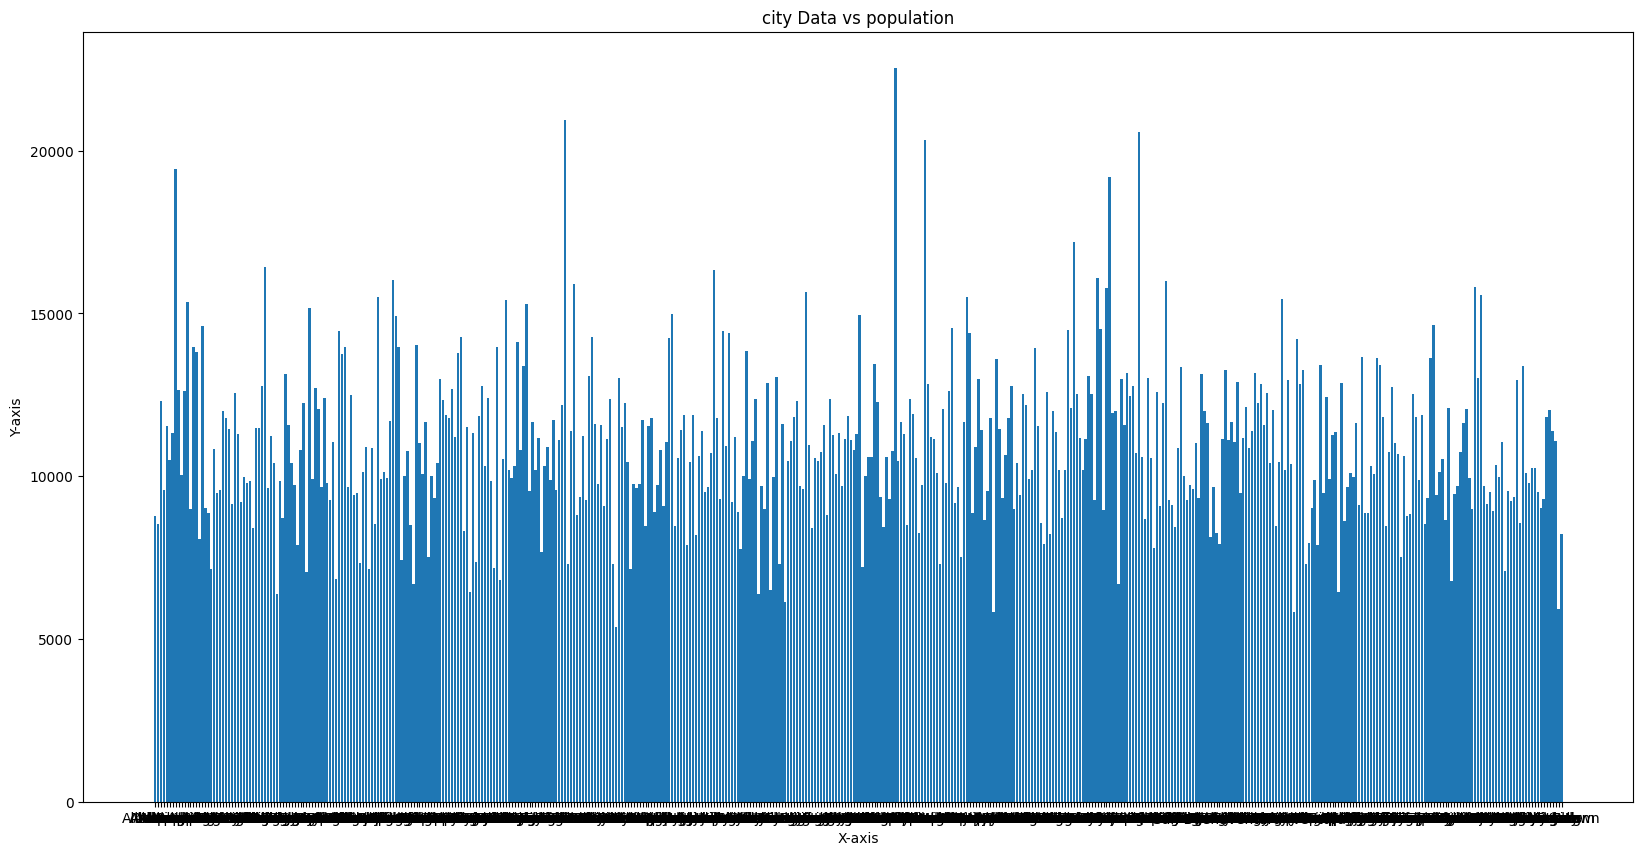

In [81]:
plt.figure(figsize=(20,10))
plot_data("city Data vs population",city_pop.index,city_pop["PopulationCount"],chart_type="bar")

# Data shows there is range of age is very high

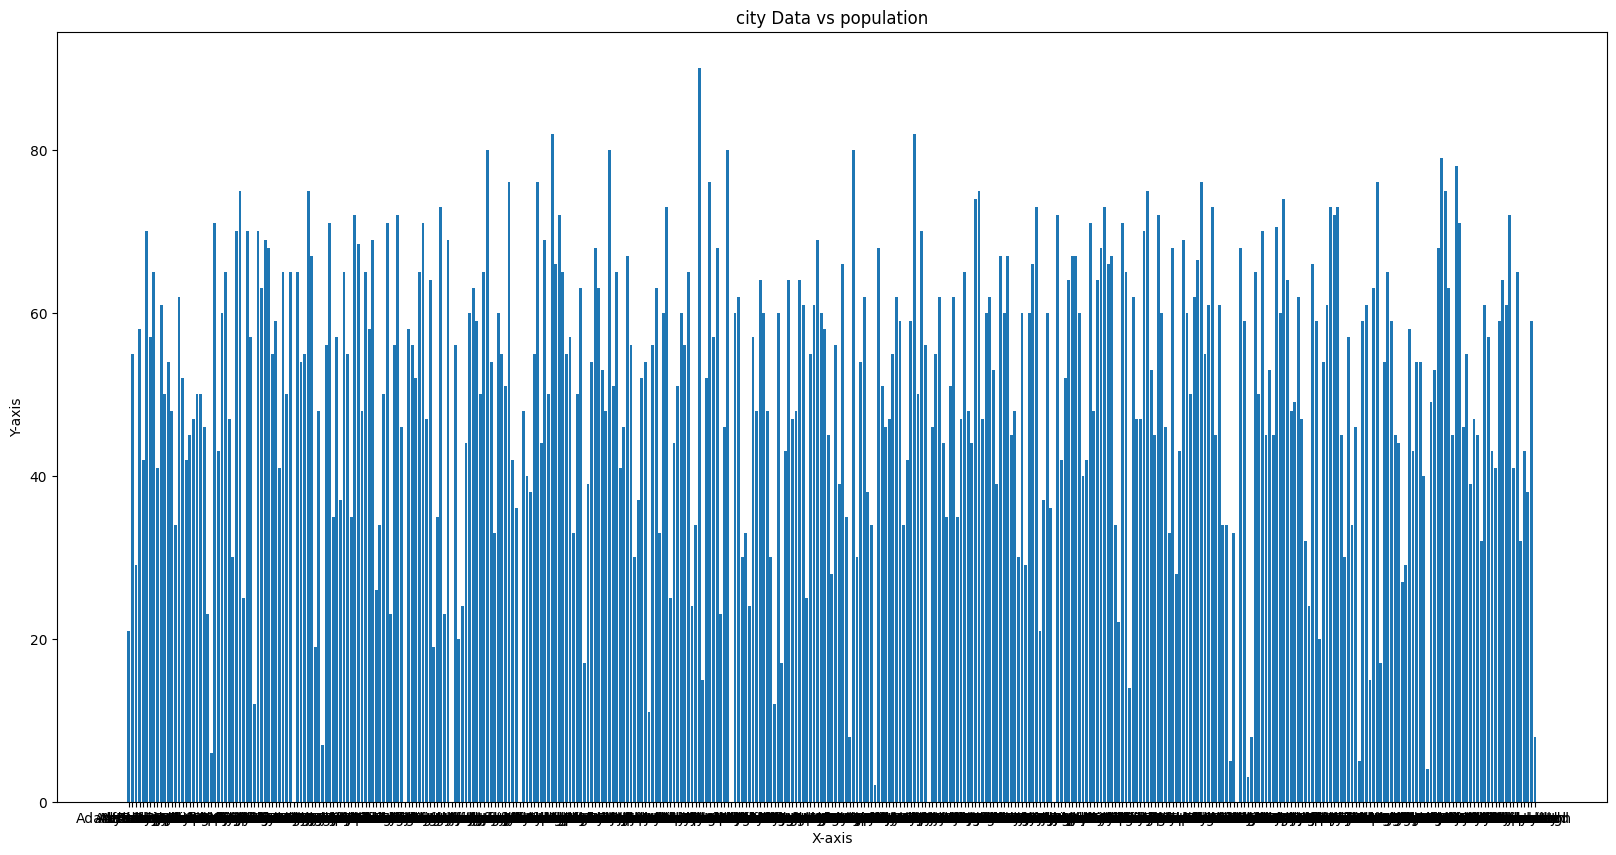

In [82]:
plt.figure(figsize=(20,10))
plot_data("city Data vs population",city_gp_snlfk.index,city_gp_snlfk["age"],chart_type="bar")

# helps to sparate data to get good sub plot

In [85]:
city_gp_snlfk.index.__len__(),city_gp_snlfk.index.__len__()/20

(393, 19.65)

In [86]:
city_gp_snlfk = city_gp_snlfk.sort_values(by ="age") # shorting dta as per age

# Analysis in  Age

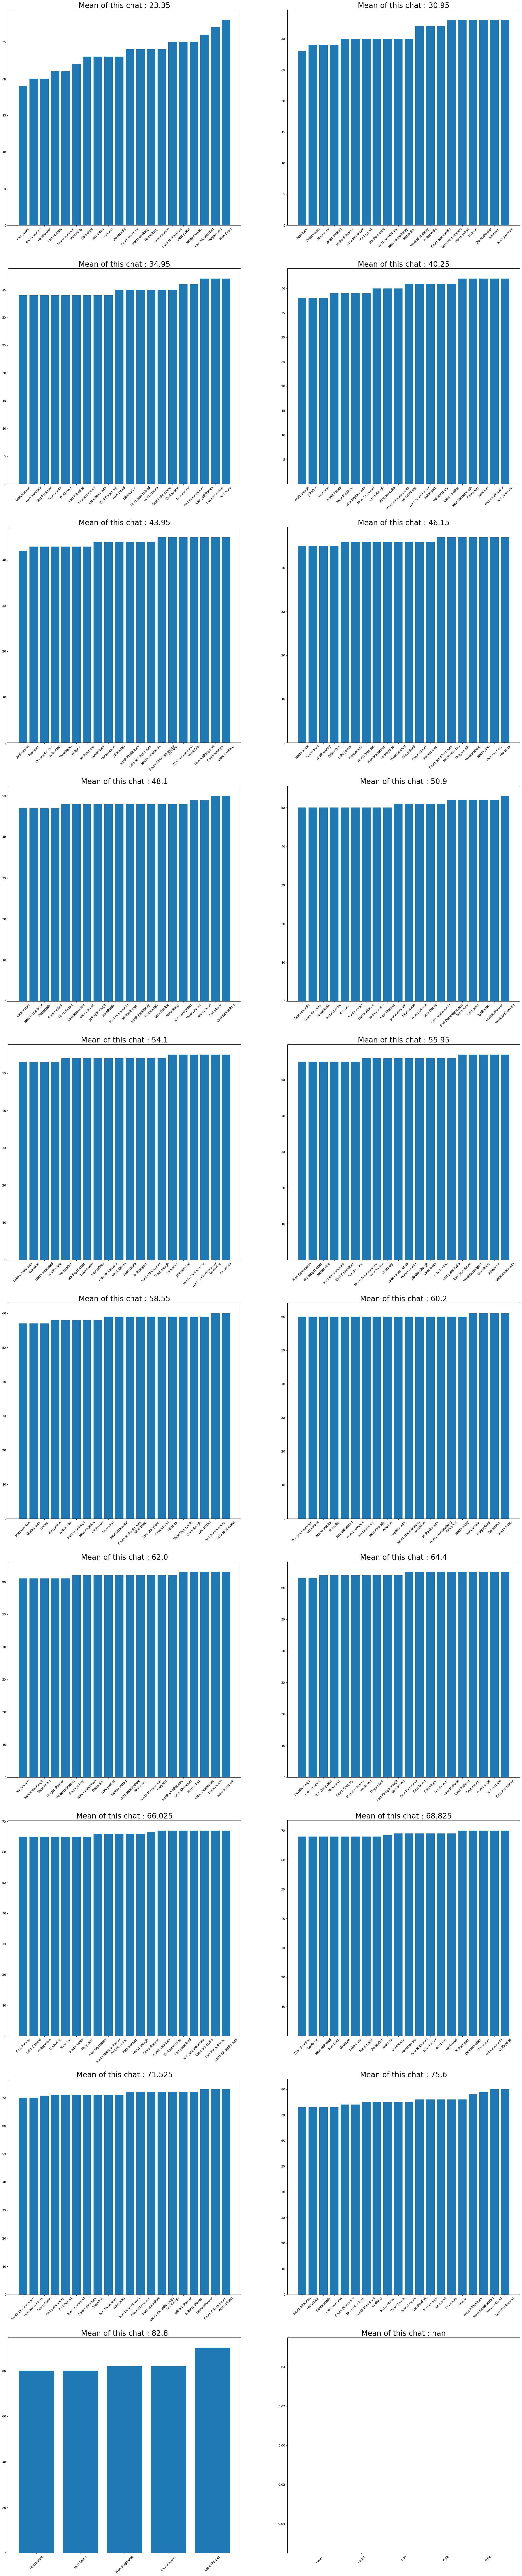

In [87]:
plt.figure(figsize=(30,150))
st_point = 0
end_point = 20
for i in range(20):
    st_point += 20
    end_point += 20
    plt.subplot(10,2,i+1)
    plt.bar(city_gp_snlfk.index[st_point:end_point],city_gp_snlfk["age"][st_point:end_point])
    plt.xticks(rotation=45)
    plt.title(f'Mean of this chat : {city_gp_snlfk["age"][st_point:end_point].mean()}',fontsize = 24)

plt.show()

The combined dataset suffers from imbalances in age and population distribution. Age groups are not evenly represented, with a higher concentration in the age range. Similarly, the population sizes vary significantly, potentially biasing the analysis towards larger populations. Further investigation and potential data augmentation techniques are necessary to address these imbalances and ensure a more representative analysis of chronic kidney disease across diverse age groups and populations.

Additionally, further analysis is needed to understand the distribution of diagnoses and other relevant variables within each age and population group. This will provide deeper insights into the prevalence and characteristics of CKD across different demographics.

By addressing these limitations and conducting a more comprehensive analysis, we can gain a more accurate understanding of CKD and develop effective strategies for prevention, diagnosis, and treatment tailored to specific populations.